<a href="https://colab.research.google.com/github/Ganeshwalimbe/Hotel-Booking-Analysis/blob/main/Ganesh_Walimbe_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#importing neccesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
#importing dataset
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter /Capstone projects /EDA2/Hotel Bookings.csv')

In [68]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [69]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [71]:
#defining new columns
data['total_customers']=data['adults']+data['children']+data['babies']
data['total_stay_in_nights']=data['stays_in_week_nights']+data['stays_in_weekend_nights']

In [8]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customers,total_stay_in_nights
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,1.968229,3.427900
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,0.722400,2.557439
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2.000000,3.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,69.000000


In [72]:
data.shape

(119390, 34)

In [73]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [74]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [75]:
data=data.drop(['company'],axis=1)

In [76]:
data.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [77]:
data.duplicated().value_counts()

False    87389
True     32001
dtype: int64

In [78]:
#dropping null values
data=data.dropna()

In [79]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  object 
 1   is_canceled                     102894 non-null  int64  
 2   lead_time                       102894 non-null  int64  
 3   arrival_date_year               102894 non-null  int64  
 4   arrival_date_month              102894 non-null  object 
 5   arrival_date_week_number        102894 non-null  int64  
 6   arrival_date_day_of_month       102894 non-null  int64  
 7   stays_in_weekend_nights         102894 non-null  int64  
 8   stays_in_week_nights            102894 non-null  int64  
 9   adults                          102894 non-null  int64  
 10  children                        102894 non-null  float64
 11  babies                          102894 non-null  int64  
 12  meal            

In [81]:
data.drop_duplicates(inplace=True)

In [82]:
data.duplicated().sum()

0

# **Hotel bookings cancellation analysis**

[Text(0.5, 1.0, 'Countplot of booking canceled in hotels')]

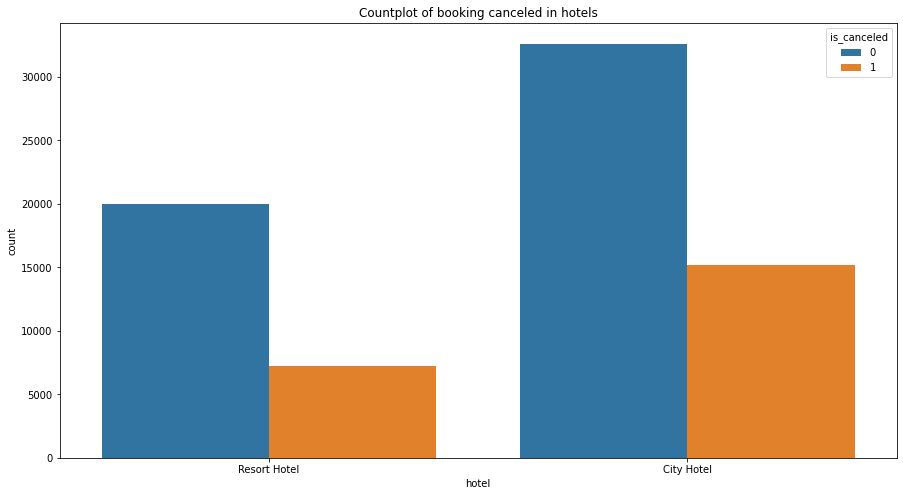

In [21]:
#cancelation in different types of hotel
fig,ax=plt.subplots(figsize=(15,8))
sns.countplot(data=data,x='hotel',hue='is_canceled',ax=ax)
ax.set(title='Countplot of booking canceled in hotels')

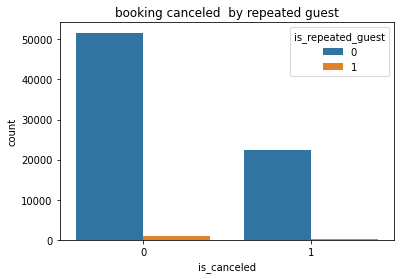

In [22]:
#Cancellations by repeated guests
plt.title("booking canceled  by repeated guest")
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = data)

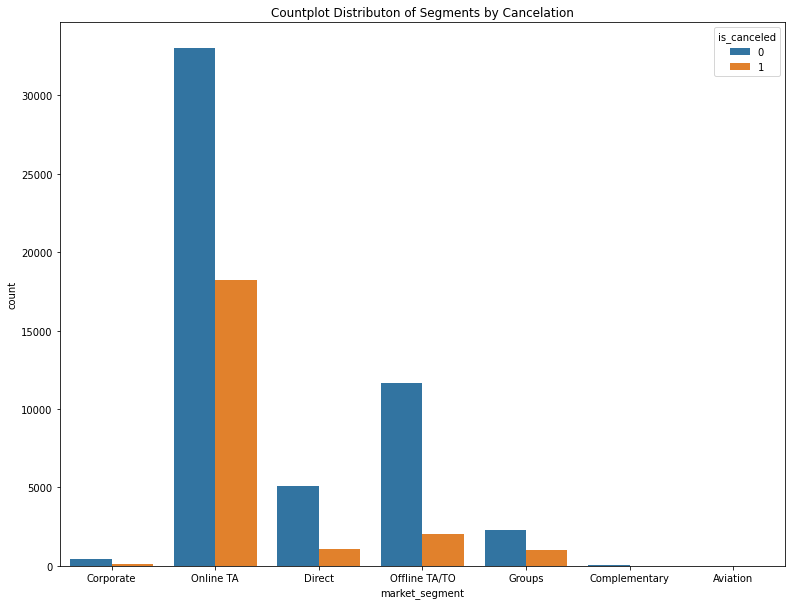

In [23]:
#plotting countplot of market segment v/s booking is canceled or not 
plt.figure(figsize = (13,10))
plt.title("Countplot Distributon of Segments by Cancelation")
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = data)

In [28]:
segments=data["market_segment"].value_counts()
segments

Online TA        51213
Offline TA/TO    13699
Direct            6182
Groups            3338
Corporate          516
Complementary       99
Aviation            24
Name: market_segment, dtype: int64

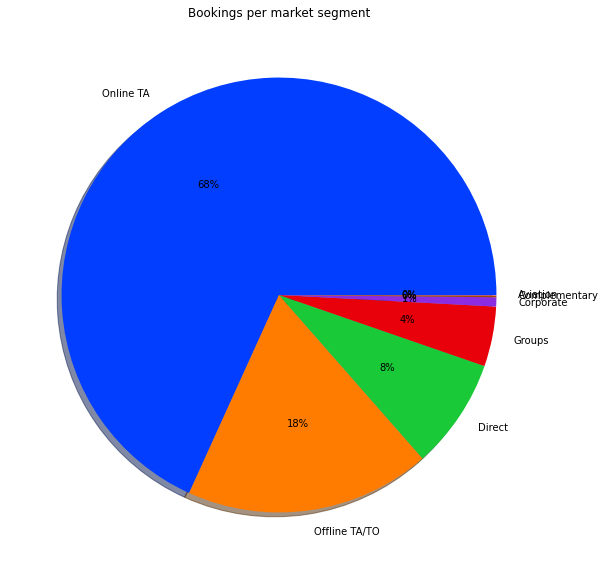

In [29]:
#plotting Bookings per market segment pie chart
segments=data["market_segment"].value_counts()
segments
plt.figure(figsize=(10,10))
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
# plotting data on chart
plt.pie(segments, labels=segments.index, colors=palette_color, autopct='%.0f%%',shadow=True)
plt.title("Bookings per market segment")

plt.show()

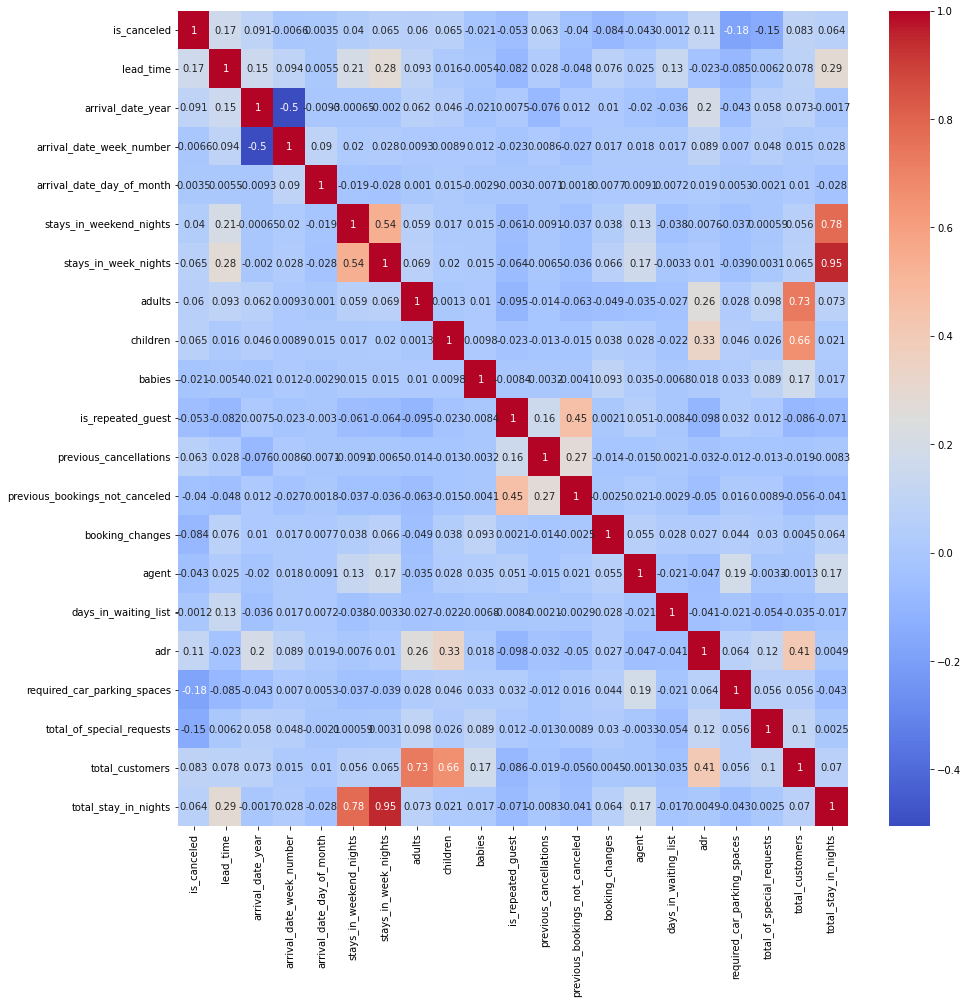

In [30]:
plt.figure(figsize=(15,15))
corr=data.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [31]:
meals=data['meal'].value_counts()
meals

BB           56823
SC            9190
HB            8401
Undefined      360
FB             297
Name: meal, dtype: int64

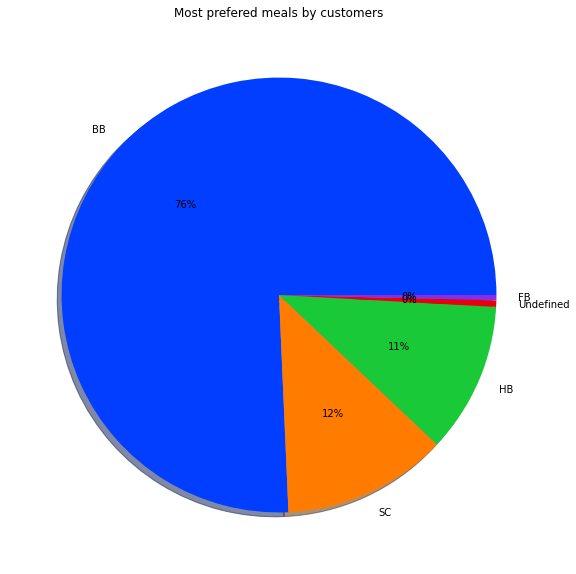

In [32]:
#plotting most prefered meals by customers
meals=data['meal'].value_counts()
plt.figure(figsize=(10,10))
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
# plotting data on chart
plt.pie(meals, labels=meals.index, colors=palette_color, autopct='%.0f%%',shadow=True)
plt.title("Most prefered meals by customers")

plt.show()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75071 entries, 3 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75071 non-null  object 
 1   is_canceled                     75071 non-null  int64  
 2   lead_time                       75071 non-null  int64  
 3   arrival_date_year               75071 non-null  int64  
 4   arrival_date_month              75071 non-null  object 
 5   arrival_date_week_number        75071 non-null  int64  
 6   arrival_date_day_of_month       75071 non-null  int64  
 7   stays_in_weekend_nights         75071 non-null  int64  
 8   stays_in_week_nights            75071 non-null  int64  
 9   adults                          75071 non-null  int64  
 10  children                        75071 non-null  float64
 11  babies                          75071 non-null  int64  
 12  meal                           

# **Top agents inviting customers in hotel**

In [34]:
top_agents=data.groupby(['agent'])['total_customers'].sum().reset_index()
top_agents=top_agents.sort_values(by='total_customers',ascending=False).head(10)
top_agents

,agent,total_customers
8,9.0,62322.0
173,240.0,28293.0
13,14.0,7134.0
6,7.0,6697.0
182,250.0,6312.0
174,241.0,3552.0
26,28.0,3100.0
7,8.0,2800.0
0,1.0,2091.0
5,6.0,2072.0


In [35]:
agent=top_agents['agent']
total_customers=top_agents['total_customers']

[Text(0.5, 1.0, 'Top agents')]

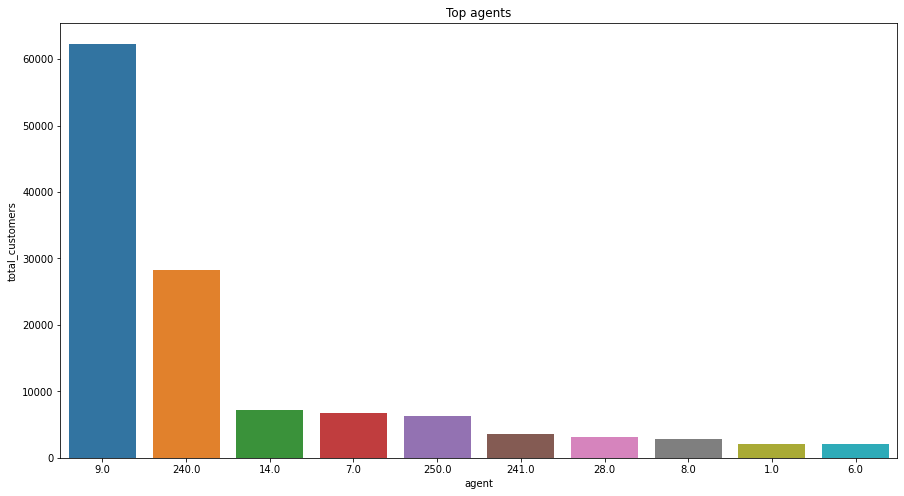

In [36]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=top_agents,x='agent',y='total_customers',order=top_agents.sort_values('total_customers',ascending = False).agent, ax=ax)
ax.set(title='Top agents')

In [37]:
data['arrival_date_day_of_month'].value_counts

<bound method IndexOpsMixin.value_counts of 3          1
4          1
7          1
8          1
9          1
          ..
119385    30
119386    31
119387    31
119388    31
119389    29
Name: arrival_date_day_of_month, Length: 75071, dtype: int64>

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75071 entries, 3 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75071 non-null  object 
 1   is_canceled                     75071 non-null  int64  
 2   lead_time                       75071 non-null  int64  
 3   arrival_date_year               75071 non-null  int64  
 4   arrival_date_month              75071 non-null  object 
 5   arrival_date_week_number        75071 non-null  int64  
 6   arrival_date_day_of_month       75071 non-null  int64  
 7   stays_in_weekend_nights         75071 non-null  int64  
 8   stays_in_week_nights            75071 non-null  int64  
 9   adults                          75071 non-null  int64  
 10  children                        75071 non-null  float64
 11  babies                          75071 non-null  int64  
 12  meal                           

# **from which country maximum customers are coming**

In [39]:
max_customers_from_countries=data.groupby(['country'])['total_customers'].sum().reset_index()
max_customers_from_countries=max_customers_from_countries.sort_values(by='total_customers',ascending=False).head(10)
max_customers_from_countries

,country,total_customers
134,PRT,39340.0
59,GBR,19823.0
56,FRA,17723.0
51,ESP,14732.0
43,DEU,10412.0
81,ITA,6207.0
76,IRL,5940.0
25,BRA,4127.0
15,BEL,4116.0
166,USA,3685.0


[Text(0.5, 1.0, 'Top 10 countries with most customers visting hotels')]

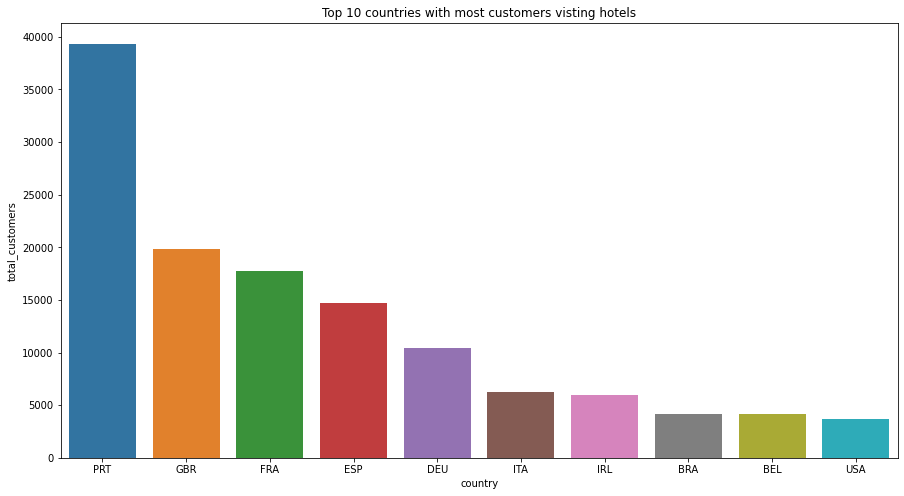

In [40]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x=max_customers_from_countries['country'],y=max_customers_from_countries['total_customers'], ax=ax)
ax.set(title='Top 10 countries with most customers visting hotels')

# **Finding out in which months most customers are visiting  hotels**

In [41]:
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

In [42]:
resort_hotel_monthly_guest = resort.groupby(['arrival_date_month'])['total_customers'].sum().reset_index()
resort_hotel_monthly_guest

,arrival_date_month,total_customers
0,April,3221.0
1,August,6326.0
2,December,2413.0
3,February,2818.0
4,January,2023.0
5,July,5939.0
6,June,3441.0
7,March,2898.0
8,May,3584.0
9,November,2435.0


In [43]:
city_hotel_monthly_guest = city.groupby(['arrival_date_month'])['total_customers'].sum().reset_index()
city_hotel_monthly_guest

,arrival_date_month,total_customers
0,April,6308.0
1,August,9039.0
2,December,3527.0
3,February,4433.0
4,January,3056.0
5,July,7978.0
6,June,6250.0
7,March,5986.0
8,May,6205.0
9,November,3255.0


In [44]:
total_guest_in_hotels = resort_hotel_monthly_guest.merge(city_hotel_monthly_guest, on = 'arrival_date_month')
total_guest_in_hotels.columns = ['month', 'total_customers_in_resort', 'total_customers_in_city_hotel']
total_guest_in_hotels

,month,total_customers_in_resort,total_customers_in_city_hotel
0,April,3221.0,6308.0
1,August,6326.0,9039.0
2,December,2413.0,3527.0
3,February,2818.0,4433.0
4,January,2023.0,3056.0
5,July,5939.0,7978.0
6,June,3441.0,6250.0
7,March,2898.0,5986.0
8,May,3584.0,6205.0
9,November,2435.0,3255.0


In [45]:
x1=total_guest_in_hotels['month']
z1=total_guest_in_hotels['total_customers_in_resort']
z2=total_guest_in_hotels['total_customers_in_city_hotel']

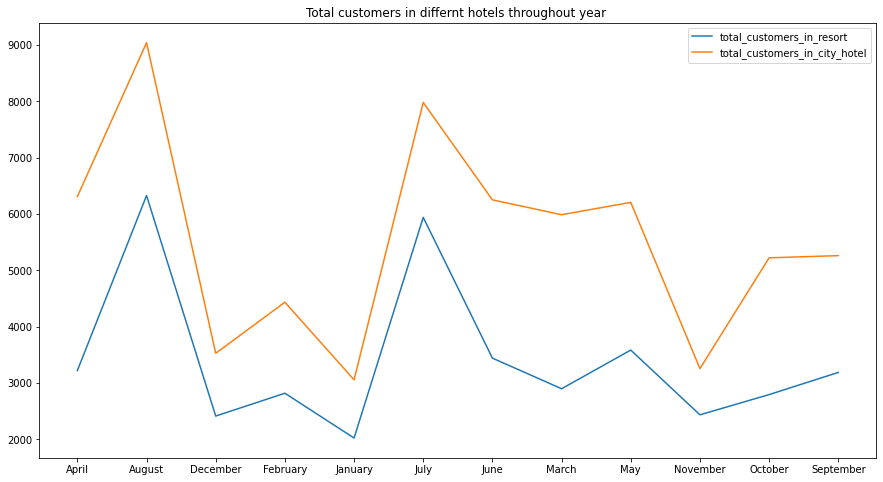

In [46]:
fig,ax=plt.subplots(figsize=(15,8))

plt.plot(x1,z1,label='total_customers_in_resort')
plt.plot(x1,z2,label='total_customers_in_city_hotel')
plt.legend()
plt.title('Total customers in differnt hotels throughout year ')
plt.show()

# **Special request for hotels throught the year**

In [115]:
special_request_resort=resort.groupby(['arrival_date_month'])['total_of_special_requests'].sum().reset_index()
special_request_resort

,arrival_date_month,total_of_special_requests
0,April,1091
1,August,2879
2,December,974
3,February,1055
4,January,835
5,July,2214
6,June,1268
7,March,971
8,May,1263
9,November,970


In [116]:
special_request_city_hotel=city.groupby(['arrival_date_month'])['total_of_special_requests'].sum().reset_index()
special_request_city_hotel

,arrival_date_month,total_of_special_requests
0,April,2572
1,August,3692
2,December,1416
3,February,1653
4,January,1175
5,July,3210
6,June,2558
7,March,2129
8,May,2781
9,November,1551


In [117]:
special_request = resort_hotel_monthly_guest.merge(city_hotel_monthly_guest, on = 'arrival_date_month')
special_request.columns = ['month', 'special_request_resort', 'special_request_city_hotel']
special_request

,month,special_request_resort,special_request_city_hotel
0,April,3221.0,6308.0
1,August,6326.0,9039.0
2,December,2413.0,3527.0
3,February,2818.0,4433.0
4,January,2023.0,3056.0
5,July,5939.0,7978.0
6,June,3441.0,6250.0
7,March,2898.0,5986.0
8,May,3584.0,6205.0
9,November,2435.0,3255.0


In [124]:
x7 =special_request['month']
z5 =special_request['special_request_resort']
z6 =special_request['special_request_city_hotel']

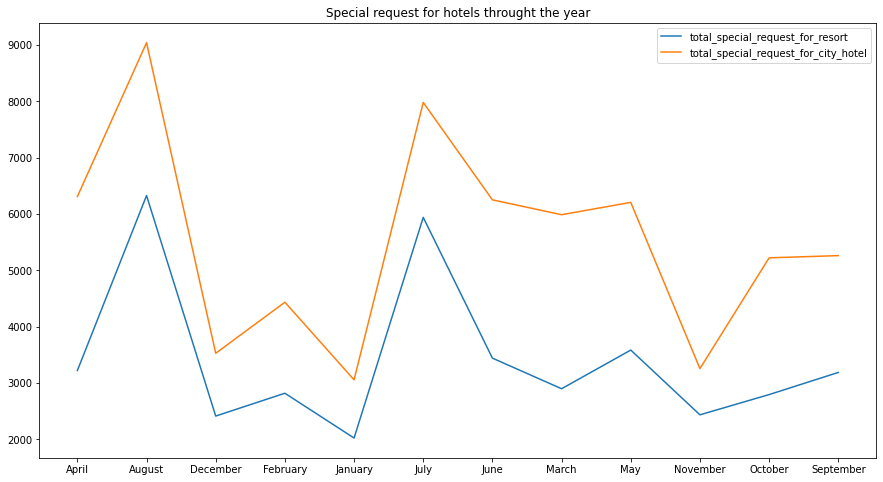

In [126]:
fig,ax=plt.subplots(figsize=(15,8))

plt.plot(x7,z5,label='total_special_request_for_resort')
plt.plot(x7,z6,label='total_special_request_for_city_hotel')
plt.legend()
plt.title('Special request for hotels throught the year')
plt.show()

# **Price variation of the rooms according to the months**

In [47]:
resort_hotel = resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,80.244533
1,August,181.885370
2,December,60.141221
3,February,55.890470
4,January,50.521993
5,July,151.224558
6,June,109.801673
7,March,59.221469
8,May,80.087191
9,November,50.000075


In [48]:
city_hotel = city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,115.961242
1,August,125.652976
2,December,92.709924
3,February,90.310457
4,January,86.065430
5,July,122.452266
6,June,123.294580
7,March,92.539954
8,May,127.743571
9,November,90.850401


In [49]:
hotels = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
hotels.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
hotels

,month,price_for_resort,price_for_city_hotel
0,April,80.244533,115.961242
1,August,181.885370,125.652976
2,December,60.141221,92.709924
3,February,55.890470,90.310457
4,January,50.521993,86.065430
5,July,151.224558,122.452266
6,June,109.801673,123.294580
7,March,59.221469,92.539954
8,May,80.087191,127.743571
9,November,50.000075,90.850401


In [50]:
x=hotels['month']
y1=hotels['price_for_resort']
y2=hotels['price_for_city_hotel']

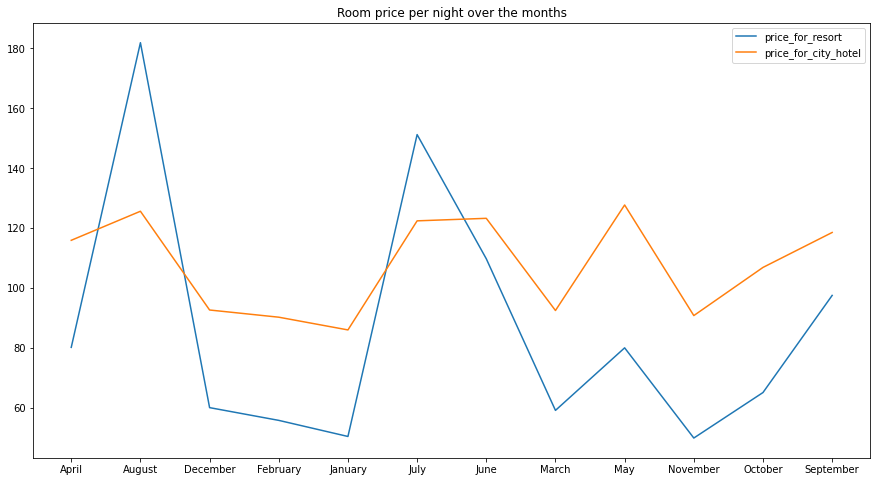

In [51]:
fig,ax=plt.subplots(figsize=(15,8))

plt.plot(x,y1,label='price_for_resort')
plt.plot(x,y2,label='price_for_city_hotel')
plt.title('Room price per night over the months')
plt.legend()
plt.show()

# ** Maximum nights spent by customers in hotels**

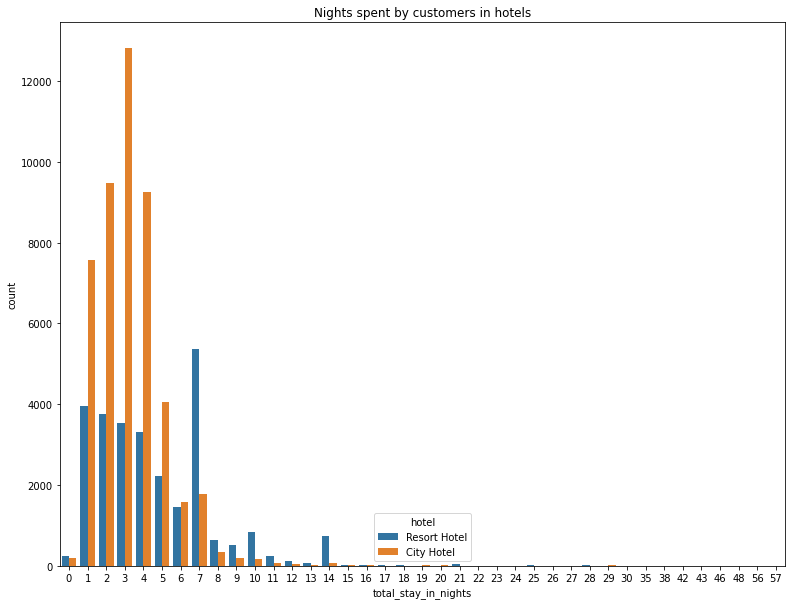

In [87]:
#plotting countplot of market segment v/s booking is canceled or not 
plt.figure(figsize = (13,10))
plt.title("Nights spent by customers in hotels")
ax = sns.countplot(x = "total_stay_in_nights", hue = 'hotel', data = data)